In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Global parameters


In [0]:
# results parameters
base_dir="/content/drive/My Drive/Colab Notebooks/DL_course/hw1/q1"

#constants
path_to_cifar="/content/drive/My Drive/Colab Notebooks/DL_course/hw1/q1/cifar-10-batches-py"
batch_name="data_batch_"
key_of_lables="labels".encode("utf-8")
key_of_data="data".encode("utf-8")
key_of_label_names="label_names".encode("utf-8")


import numpy as np

# Prepare CIFAR10 data

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def get_all_data_and_lables():
  all_lables = []
  all_data = None
  for i in range(1,7):
    batch_path = path_to_cifar + "/" + batch_name + str(i)
    if i == 6:
      batch_path = path_to_cifar + "/test_batch"
    print("unpickling batch number " +str(i) + ":")
    cur_batch_dict = unpickle(batch_path)
    cur_batch_lables = cur_batch_dict[key_of_lables]
    cur_batch_data = cur_batch_dict[key_of_data]
    all_lables = all_lables + cur_batch_lables
    if i == 1:
      all_data = cur_batch_data
    else:
      all_data = np.concatenate((all_data, cur_batch_data), axis=0)

  return all_data, all_lables

def get_label_names():
  metadata_path = path_to_cifar + "/batches.meta"
  metadata_dict = unpickle(metadata_path)

  return [x.decode("utf-8") for x in metadata_dict[key_of_label_names]]

def get_random_ten_percent_of_data(all_data, all_lables):
  ten_percent_of_data_length = len(all_lables) // 10
  perm = np.arange(len(all_lables))
  np.random.shuffle(perm)
  sample_indices = perm[:ten_percent_of_data_length]
  images = all_data[sample_indices]
  lables = np.asarray(all_lables)[sample_indices]

  return images, lables

def get_train_and_test_data(images, lables):
  train_size = (len(lables) // 6) * 5

  train_images = images[:train_size]
  train_lables = lables[:train_size]
  train_set = (train_images, train_lables)

  test_images = images[train_size:]
  test_lables = lables[train_size:]
  test_set = (test_images, test_lables)
  return train_set, test_set






all_data, all_lables = get_all_data_and_lables()
label_names = get_label_names()
print(label_names)
images, lables = get_random_ten_percent_of_data(all_data, all_lables)
train_set, test_set = get_train_and_test_data(images, lables)



unpickling batch number 1:
unpickling batch number 2:
unpickling batch number 3:
unpickling batch number 4:
unpickling batch number 5:
unpickling batch number 6:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Baseline Resultst:
1. SVM with linear Kernel.
2. SVM with RBF kernel

In [0]:
from sklearn import svm

linear_svc = svm.SVC(kernel='linear')
rbf_svc = svm.SVC(kernel='rbf')

train_images, train_lables = train_set
linear_svc.fit(train_images, train_lables)
rbf_svc.fit(train_images, train_lables)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Linear-kernel SVM results:
[[488   0   0   0   0   0   0   0   0   0]
 [  0 541   0   0   0   0   0   0   0   0]
 [  0   0 486   0   0   0   0   0   0   0]
 [  0   0   0 494   0   0   0   0   0   0]
 [  0   0   0   0 541   0   0   0   0   0]
 [  0   0   0   0   0 506   0   0   0   0]
 [  0   0   0   0   0   0 489   0   0   0]
 [  0   0   0   0   0   0   0 468   0   0]
 [  0   0   0   0   0   0   0   0 513   0]
 [  0   0   0   0   0   0   0   0   0 474]]


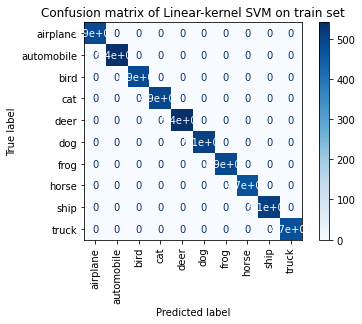

1.0
[[48  7 12  5  7  3  2  3 15  3]
 [ 5 45  2  3  2  5  2  4 11 18]
 [ 9  9 30  9 14  9  9  4  3  1]
 [ 6  5 14 18 11 11  7  6  5  5]
 [ 1  8 22  6 31 13  6  8  2  3]
 [ 6  9 12 24 10 21 11  5  4  2]
 [ 6  4 17 19 11 11 33  4  1  2]
 [ 6  7 18  7 12  6 10 19  4  8]
 [23 11  9  7  2  0  2  1 40  6]
 [11 18  7  4  8  2  6 11 13 23]]


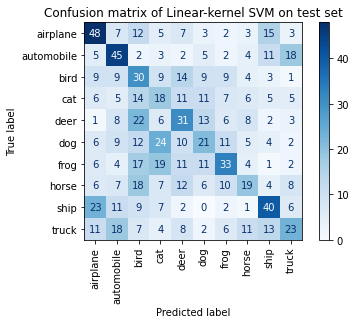

0.308
RBF-kernel SVM results:
[[354  12  10   9  11  12  11   3  53  13]
 [  4 464   4   7   6   1   7   3  18  27]
 [ 38  10 237  19  80  16  49  11  17   9]
 [ 16   7  19 322  35  41  35   4   7   8]
 [ 27   8  25  19 368  13  42  16  10  13]
 [  8   7  36  35  41 331  25  11   6   6]
 [  8   8  21  16  50  14 359   3   5   5]
 [ 13  11  16  16  38  11  14 329  13   7]
 [ 29  23   4   6   9   3   5   3 419  12]
 [ 11  22   7   6   4   3  12   8  11 390]]


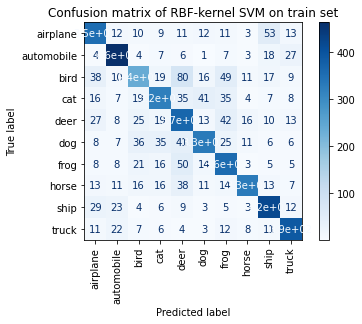

0.7146
[[54  8  6  2  3  5  3  4 17  3]
 [ 8 52  1  4  1  0  2  2  7 20]
 [15  5 21  9 23  3 10  6  4  1]
 [ 2  5  4 23 11 23  8  4  4  4]
 [ 4  4 12  2 52  5 14  4  2  1]
 [ 1 11  5 19  9 42  7  4  3  3]
 [ 3  4  8  7 19 10 53  1  1  2]
 [ 6  6  4  7 14  8  8 35  2  7]
 [14 16  4  3  0  3  0  0 57  4]
 [ 6 21  2  5  0  4  3  8  8 46]]


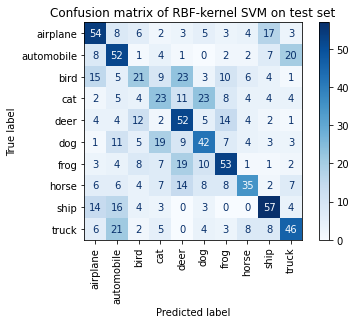

0.435


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


def report_results_of_model(model_name, model):
  print(model_name + " results:")
  np.set_printoptions(precision=2)
  
  disp = plot_confusion_matrix(model, train_images, train_lables,
                                 display_labels=label_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 xticks_rotation='vertical')
  disp.ax_.set_title("Confusion matrix of " + model_name + " on train set")
  print(disp.confusion_matrix)
  plt.savefig(base_dir + '/' + model_name + '_train_confusion_matrix.png')
  plt.show()
  predicted_train_lables = model.predict(train_images)
  accuracy_train = accuracy_score(train_lables, predicted_train_lables)
  print(accuracy_train)

  test_images, test_lables = test_set
  disp = plot_confusion_matrix(model, test_images, test_lables,
                                 display_labels=label_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 xticks_rotation='vertical')
  disp.ax_.set_title("Confusion matrix of " + model_name + " on test set")
  print(disp.confusion_matrix)
  plt.savefig(base_dir + '/' + model_name + '_test_confusion_matrix.png')
  plt.show()
  predicted_test_lables = model.predict(test_images)
  accuracy_test = accuracy_score(test_lables, predicted_test_lables)
  print(accuracy_test)






report_results_of_model("Linear-kernel SVM", linear_svc)
report_results_of_model("RBF-kernel SVM", rbf_svc)


